<a href="https://colab.research.google.com/github/manmal021/CPSMA3933_Labs_Manish/blob/main/Project_Assignments/RegressionAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Assignment

I want you to practice some regression and analyzing your results.  Utilize this document to load data directly.

In [2]:
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt

## Linear Regression

Fit goals vs points in a linear regression.  Fit a multiple regression on goals and assists vs points.  What do you notice about these two fits.
https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/hockey.csv

In [4]:
df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/hockey.csv')

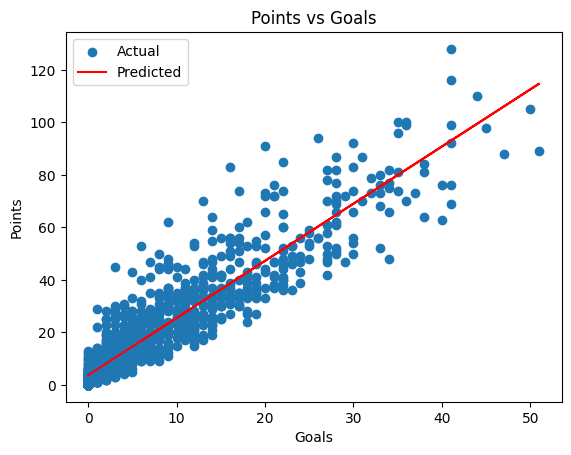

Simple Regression R²: 0.8461669386312143
Multiple Regression R²: 1.0


In [24]:
# Import libraries
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load data
df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/hockey.csv')

# Simple Linear Regression: Goals -> Points
x1 = np.array(df[['G']])
y = np.array(df['PTS'])

model1 = LinearRegression()
model1.fit(x1, y)
y_pred1 = model1.predict(x1)

# Multiple Regression: Goals + Assists -> Points
x2 = np.array(df[['G', 'A']])
model2 = LinearRegression()
model2.fit(x2, y)
y_pred2 = model2.predict(x2)

# Plot simple regression
plt.scatter(df['G'], y, label='Actual')
plt.plot(df['G'], y_pred1, color='red', label='Predicted')
plt.title('Points vs Goals')
plt.xlabel('Goals')
plt.ylabel('Points')
plt.legend()
plt.show()

# Compare scores
print("Simple Regression R²:", model1.score(x1, y))
print("Multiple Regression R²:", model2.score(x2, y))


## Logistic Regression

Using the 538 Avengers dataset,https://github.com/fivethirtyeight/data/blob/master/avengers/avengers.csv, fit a logistic regression to predict `Death1` (first time a character might die) based on whatever variables you find interesting.  Make a prediction using probabilities on your favorite character.

In [25]:
# Import libraries
import pandas as pa
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load data
df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/Avengers')

# Prepare target column
df['Death1'] = df['Death1'].fillna('NO').map({'NO': 0, 'YES': 1})

# Encode categorical features
df['Gender'] = LabelEncoder().fit_transform(df['Gender'].astype(str))
df['Current?'] = LabelEncoder().fit_transform(df['Current?'].astype(str))

# Select features and target
X = df[['Appearances', 'Gender', 'Current?']]
y = df['Death1']

# Train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Accuracy
print("Accuracy:", model.score(X_test, y_test))

# Predict on a sample character
sample = [[1500, 1, 1]]  # 1500 appearances, Male, Current
prob = model.predict_proba(sample)
print("Chance of Death1 (Yes):", prob[0][1])


Accuracy: 0.5714285714285714
Chance of Death1 (Yes): 0.5012314003901724


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Find Your Own Regression

I have compiled olympic 100m dash records from a wikipedia page https://en.wikipedia.org/wiki/100_metres_at_the_Olympics.  Use this data and fit a regression of some type for prediciting `Time`.  Justify your model used in words and pictures. Predict the new Olympic Record for 2024 and 2300.  Describe in words the validity of your predictions.

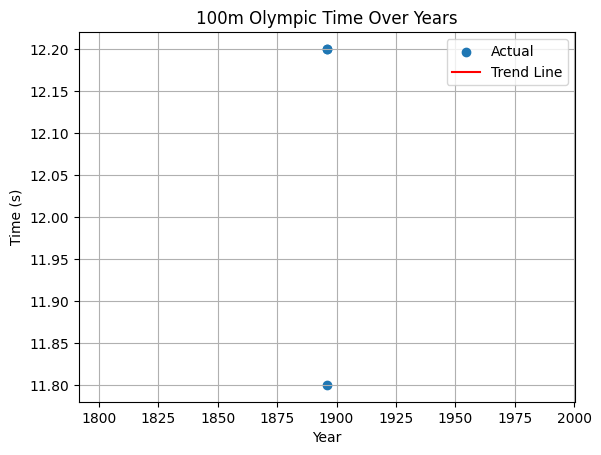

Predicted time in 2024: 12.066666666666668
Predicted time in 2300: 12.066666666666668


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [27]:
# Import libraries
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load data
df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/100mOlympicRecords.csv')

# Extract year from date
df['Year'] = pa.to_datetime(df['Date'], errors='coerce').dt.year
df = df.dropna(subset=['Year'])

# Prepare features and target
X = df[['Year']]
y = df['Time']

# Train model
model = LinearRegression()
model.fit(X, y)

# Plot trend
plt.scatter(X, y, label='Actual')
plt.plot(X, model.predict(X), color='red', label='Trend Line')
plt.xlabel('Year')
plt.ylabel('Time (s)')
plt.title('100m Olympic Time Over Years')
plt.legend()
plt.grid(True)
plt.show()

# Predict future times
print("Predicted time in 2024:", model.predict([[2024]])[0])
print("Predicted time in 2300:", model.predict([[2300]])[0])
